In [15]:
import numpy as np
from numpy import random as rand

# Lecture 0: Hypothesis Testing and Bayesian Inference

## Hypothesis Testing

Let's suppose that we want to study the heights of women in an auditorium in the United States. As each attendee walks through the door, if they are a woman, we measure their height in feet and log it into a table. We end up getting 100 records, stored in the variable `height_data`.

We wish to know if the women in this hall are unusually different in height from the average. Suppose we know that the United States *average for women's height is 5.3 ft*. How do we go about answering this question?

In [26]:
height_data = np.array([ 5.4463325 ,  5.62446452,  5.53362717,  5.41840439,  5.54579968,
        5.51183131,  5.53218392,  5.4654995 ,  5.4901124 ,  5.52057526,
        5.30584564,  5.42439939,  5.55457067,  5.54465133,  5.44327523,
        5.62037858,  5.52781788,  5.50287702,  5.41490811,  5.48793098,
        5.46397703,  5.50804981,  5.66262185,  5.47081631,  5.4647536 ,
        5.49797981,  5.39970744,  5.57966582,  5.51613665,  5.45592252,
        5.47052281,  5.49876025,  5.46882465,  5.44975778,  5.44192282,
        5.47944829,  5.58792179,  5.53632426,  5.52901173,  5.46543961,
        5.56631818,  5.52534841,  5.41354291,  5.51852838,  5.46921556,
        5.48675372,  5.44138706,  5.45842293,  5.55172381,  5.57867342,
        5.48032121,  5.51238043,  5.54710415,  5.45894236,  5.56520315,
        5.55374592,  5.5128164 ,  5.41981803,  5.43610157,  5.51565714,
        5.50572584,  5.38422721,  5.58470447,  5.34516383,  5.53209321,
        5.53490615,  5.4891404 ,  5.49261317,  5.45588945,  5.41994864,
        5.44053361,  5.4413407 ,  5.46232118,  5.53635502,  5.38358796,
        5.4886594 ,  5.46582025,  5.61535408,  5.49692262,  5.35964358,
        5.47217035,  5.3502072 ,  5.43681851,  5.55927506,  5.45716359,
        5.68261663,  5.39582853,  5.55418574,  5.4420215 ,  5.55767895,
        5.33742007,  5.55390882,  5.36797114,  5.49809592,  5.52609733,
        5.47785981,  5.47016941,  5.49406023,  5.51270129,  5.5315854 ])

### What Can We Do?

Clearly we cannot use pure logic to figure this out and there isn't an exact yes or no answer to this question. But we can wonder whether the chances of finding a group of 100 women with at least this particular average height is 'small' **assuming that our sample actually follows the national trend and has a true mean of 5.3 ft**.

This method of inquiry is similar to the idea of proof by contradiction. If we thought our auditorium was unusual, we would assume that our sample isn't particularly special with respect to height, and aim to show a contradiction. The probability of such an event being 'small' is analogous to our hypothetical contradiction.

Here, 'small' will mean that such chances are below a predefined cut-off value $\alpha$, which we call the *level of significance* of the test. We will explore this more later.

To answer our question, we do the following:
1. We make some hypothesis

    + $H_0$: Our sample mean is the same as the national average and any deviations are produced by random processes alone
    
    + $H_a$: Our sample mean is different from the national average and deviations are not SOLELY produced by random processes

2. We choose a reasonable level of significance, $\alpha$, upon which we will decide whether or not to reject $H_0$

2. We will assume that $H_0$ is true and compute the probability of getting a result at least as extreme as our sample mean. This probability is denoted $p$ and called the **p-value** of the test

3. We compare the p-value to our cut-off, $\alpha$

    + If $p < \alpha$, then we reject $H_0$ for this trial with significance level $\alpha$
    
    + If $p \geq \alpha$, we cannot reject $H_0$ for this trial with significance level $\alpha$

### Let's Do Some Math: The One Sample T-Test

Let us consider our $n$ points of data as a realization of $n$ independent, identically distributed random variables (i.i.d's) 

$$x_1, x_2, \dots , x_{n}$$

Since $x_i$ represents heights, and height is produced by a multitude of independent random effects in the same population, we know by the Central Limit Theorem that each of these variables can be thought of as normally distributed, all with the same mean and variance

$$x_i \sim \mathcal{N}(\mu, \sigma)$$

From this, we construct a new random variable $\bar{x}$, whose realizations represent sample means

$$\bar{x} = \sum_{i=1}^{n} \frac{x_i}{n}$$

The CLT tells us that since $x_i \sim \mathcal{N}(\mu, \sigma)$, 
$$\bar{x} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$$

We now construct another random variable, $Z$, which gives us information about how different $\bar{x}$ is from $\mu$

$$Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} = \sqrt{n} \cdot \frac{(\bar{x} - \mu)}{\sigma} = \frac{\bar{x} - \mu}{\sqrt{\frac{\sigma^2}{n}}}$$

W.S Gosset, writing under the pseudonym 'Student', proved that $Z \sim \mathcal{N}$ **only when** $x_i$ are normally distributed and both $\mu$ and $\sigma$ are known. If, instead, we knew only $\mu$ and estimated $\sigma$ by the sample standard deviation $s$, then our estimated z-score

$$ T = \sqrt{n} \cdot \frac{(\bar{x} - \mu)}{s} = \frac{\bar{x} - \mu}{\sqrt{\frac{s^2}{n}}} $$

follows a **t-distribution** rather than a normal distribution. The t-distribution is symmetric, bell-shaped, and approximates the normal distribution increasingly well with a greater number of trials. What's more, the t-distribution does not depend on either $\mu$ or $\sigma$, but only on a data-dependent term called the *degrees of freedom*, DF!

Note that to calculate the same standard deviation $s$, you must use Bessel's correction, which scales the uncorrected sample variance by $\frac{n}{n-1}$. The '1' in $n-1$, relates to the fact that we wish to estimate one parameter, $\mu$ using our sample data.

We define $DF = n - a$, where $n$ is the number of samples ($n = 100$) and $a$ is the number of parameters we aim to estimate from the sample ($a = 1$, namely the mean $\mu$). In our case, $DF = 99$, $\bar{x} = \sum_{i=1}^{100} \frac{x_i}{100}$, and $ T = \sqrt{100} \cdot \frac{(\bar{x} - \mu)}{s} $

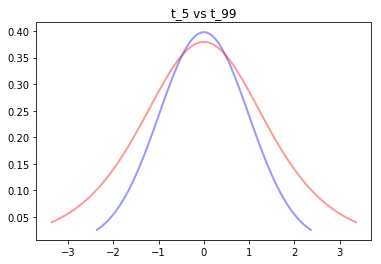

In [48]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df = 99
df2 = 5
x = np.linspace(t.ppf(0.01, df),
              t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
        'b-', lw=2, alpha=0.4, label='t pdf')

x2 = np.linspace(t.ppf(0.01, df2),
              t.ppf(0.99, df2), 100)
ax.plot(x2, t.pdf(x, df2),
         'r-', lw=2, alpha=0.4, label='t pdf')
plt.title('t_5 vs t_99')
plt.show()

### Let's See It In Action!

Now, noting that $T \sim t_{99}$, we can translate our above decision-making process into math:

1. Let $\mu_0$ be the known average height of women in the US, and $\mu$ be the expected sample mean
    + $H_0$: $\mu = \mu_0$
    + $H_a$: $\mu \neq \mu_0$

2. Let us choose $\alpha = 0.05$, or 5%
    
2. Assume $H_0$ is true (so $\mu$ in the above calculations can be replaced by the population mean, 5.3 ft). Let $T_x$ be the value of $T$ that we get from our data. We calculate
$$ p = P(\ |T| \geq T_x\ \mid \ H_0) $$

4. If $p < \alpha$, we reject $H_0$ for this trial (and thus accepting $H_a$). Otherwise, we decide not to reject (accepting $H_0$)

#### Calculations
We will calculate the p-value 'manually', and then confirm it using `scipy.stats`

In [68]:
from numpy import sqrt, mean, std, var
from scipy.stats import t

#Step 1
mu_0 = 5.3 #Population mean
mu = mu_0 #Assuming H_0

#Step 2
alpha = 0.05 #Choosing significance level

#Step 3
n = 100 #Number of trials
a = 1 #Number of parameters
df = n - a #Degrees of freedom

x_bar = mean(height_data) #Sample mean
s = std(height_data, ddof=a) #Sample Standard Deviation with 'a' parameters
T_x = sqrt(n)*(x_bar - mu)/s
p = 2*t.sf(abs(T_x),df) #sf is defined as 1 - cdf of the t-distribution. Doubling gives the two-tailed p-value

#Step 4
print (f'T_x = {T_x}, p = {p}')
if p <= alpha:
    print('Reject H_0')
else:
    print('Do not reject H_0')




T_x = 27.771597524482274, p = 1.5848015021140444e-48
Reject H_0


In [69]:
from scipy.stats import ttest_1samp

T_x, p = ttest_1samp(height_data,mu_0) #scipy.stats 1 sample t-test

print(f'T_x = {T_x}, p = {p_val}')
if p <= alpha:
    print('Reject H_0')
else:
    print('Do not reject H_0')

T_x = 27.771597524482274, p = 1.5848015021140444e-48
Reject H_0


### How Can We Screw Up? Precision and Recall

There are two ways this test can lead us wrong:
1. We end up rejecting $H_0$ when it was actually true (called a Type I error)
2. We end up not rejecting $H_0$ when it was actually false (called a Type II error)

If we observe Type I errors, we can see that this depends only on what we decided our cut-off value was, since that is what determined rejection when $H_0$ was true. *Hence the level of significance, $\alpha$ is also the probability of a Type I error*

We similarly denote the probability of a Type II error by $\beta$.

#### Precision and Recall

Given this information, we can make a table of all possible outcomes of the test

|  |   | $H_0$ is False  |   | $H_0$ is True  |
|---|---|---|---|---|
| Rejected $H_0$  |   | True Positives  |   | Type I Errors  |
|   |   |   |   |   |
| Did Not Reject $H_0$  |   | Type II Errors  |   | True Negatives  |

We define the ** precision ** of our test to be $$\text{precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{Type I Errors}} $$ The precision is a measure of how likely it is that $H_0$ is false, given we rejected it. It denotes predictive power of the test.

We define the ** recall ** of our test to be $$\text{recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{Type II Errors}} $$ The recall is a measure of how likely it is that we reject $H_0$ given that it is false. It denotes the probability of detecting false hypotheses.

Choosing $\alpha$ and $\beta$ in your experiment affects all four of these quanitites, and so it should be done carefully to minimize detrimental errors, and maximize strength of the test in your given scenario.

### What Did We Assume Again?

Looking back at our analysis, we can see that we made a couple assumptions about our data before using the T-Test. It is necessary that the following conditions are verified before a T-Test can be used, since otherwise the mathematics simply won't hold:

#### Conditions
1. The data must be independent (random samples)
2. The populations that the data come from must be approximately normally distributed (This was used in the proof of Gosset). For example, $x_i \sim t_{DF}$ satisfies this condition
3. The variances $\sigma_i^2$ must be equal
4. The data must be continuous (T-Tests do not apply to discrete random variables)
5. The data must be commensurable. This means that there must be a common metric with which all the data can be measured, such as degrees Celsius, degrees Fahrenheit, meters, gallons, etc. **In particular, a T-Test cannot be used on a collection of probabilities!**

### What Does The P-Value Mean?

Let's recall from earlier that the p-value is the probability that one obtains a characteristic number (like $T$) at least as extreme as the one our data gives us. What do we mean by 'at least as extreme'? In our example, 'more extreme' is interpretted as 'has a T-score farther from 0 than $T_x$'. This was represented mathematically as the two-tailed probability
$$p = P(\ |T| \geq T_x\ \mid \ H_0) = P(\ T \geq T_x\ OR\  T \leq -T_x\ \mid \ H_0) $$

Depending on the circumstance, you may elect to use the one-tailed probabilities
$$p = P(\ T \geq T_x\ \mid \ H_0) $$ or $$p = P(\ T \leq -T_x\ \mid \ H_0) $$ if you were test was only considering whether or not the women in the auditorium were significantly taller, or shorter respectively than the national average.

One thing to keep in mind is that the p-value is always defined **under the assumption that $H_0$ is true!** The p-value is conditional on this assumption, and this leads us to the following:

#### What DOESN'T The P-Value Mean?

1. **The p-value is NOT the probability that $H_0$ is true.** It relies on the assumption that $H_0$ is true to even exist!
2. **The p-value is NOT the probability that the observed effects were produced by random chance alone.** Going back to read our definition of $H_0$, this would be equivalent to Misconception 1.
3. **A p-value of less than 0.05 is NOT necessarily significant.** The 0.05 level of significant is arbitrarily chosen. A test is more confident of the decision to reject the null for smaller $\alpha$, however this raises the chance that you actually keep a false null hypothesis.
4. **A small p-value does NOT mean the property being tested is important.** Unimportant effects can return small p-values precisely because they may be uncommonly directly observed.

#### Takeaway

* The p-value and choice of $\alpha$ form a criterion by which the researcher can make a decision about their hypotheses. They do not in any way refer to the probabilities of the hypotheses themselves. *By repeating experiments many times and reasonably lowering $\alpha$, the researcher aims to make a metaphorical sieve through which hypotheses without enough evidence supporting them are rejected, and the remaining are tested once again.* A single p-value is dependent on the current data, and shouldn't be used as a measure of truth, but rather a measure of the strength of evidence.

### Paired and Two Sample T-Tests

Depending on your data and the kind of hypothesis you wish to make, there are other types of T-Tests which you can employ. The proceedure will be almost exactly as above, except we may have a different definition for the characteristic random variable $T$. All the following tests follow the t-distribution with the specified DF value:

#### Paired T-Test

This is used when your data comes in connected sample pairs, $(x_1,y_1), (x_2,y_2), \dots, (x_n,y_n)$ where ever pair $(x_i,y_i)$ is independent of the others. We are interested in the differences in treatment for each subject $$d_i = y_i - x_i$$

We wish to test whether or not a given treatment had any effect, $$H_0:\ \mu_d = 0$$ and so we apply the One Sample T-Test to the sequence of differences, $d_1, d_2, \dots, d_n$ with $DF = n-1$, since $x_i, y_i$ are **not** independent of one another. We make the assumption that $d_i$ is approximately normally distributed, satisfying the conditions of the One Sample T-Test. One strength of this is that the original variables $x_i,\ y_i$ can be very far from normally distributed, so long as their difference is normal. 

#### Two Sample T-Tests

Suppose you have two independent samples from normally distributed populations of equal variance (labeled by 1 and 2). Further suppose that you have equal sample sizes $n$, and you wish to test the hypothesis $$H_0:\ \mu_1 = \mu_2 $$

Then we consider the new random variable $$\bar{t} = \frac{|\bar{x_1} - \bar{x_2}|}{\sqrt{\frac{s_1^2 + s_2^2}{n}}} $$ where $\bar{x_i}$ is the sample mean, and $s_i^2$ is the sample variance. Since the samples are independent, we have $DF = (n-1) + (n-1) = 2n-2$, and so $$\bar{t} \sim t_{2n-2}$$

If the two sample sizes are not too small and not too different, this test is very robust against departures from normal distributions, making this a very versatile test.

## Bayesian Posterior Inference

In the previous section, we made note that p-values tell you the probability you saw your data given a null hypothesis. Suppose we actually wanted to know the probability of that hypothesis instead, given we saw the data we got. How can we do this?

### Bayes' Formula

Bayes' Formula gives you a way of converting between these two types of probabilities! Suppose $X = (x_1,\dots, x_n)$ where the $x_i$'s are i.i.ds but with unknown distribution. Let $\theta$ be the parameter of the data's distribution. Note that $\theta$ parameterizes hypotheses about the distribution of $x_i$. Then $$P(\ \theta\ \mid\ X\ ) = \frac{P(\ X\ \mid\ \theta\ )\cdot P(\ \theta\ )}{P(\ X\ )} = \frac{P(\ X\ \mid\ \theta\ )\cdot P(\ \theta\ )}{\int P(\ X\ \mid\ \theta\ )\cdot P(\ \theta\ ) d\theta} $$

One particular feature of this equation is the existence of $P(\theta)$ in the numerator. This is the **prior probability** of $\theta$, since it represents the 'belief' in the truth of $\theta$ before having seen the data $X$. The term $P(\ X\ \mid\ \theta\ )$ is known as the **likelihood function**.

#### Some Difficulties

Attempting to use Bayes' Formula for our inferences provides us with some challenges. 

* How do we decide on what prior to choose for $\theta$, or for that matter, does there even exist a prior which will stabilize at the true distribution after many updates? An answer to this question comes in the form of **De Finetti's Representation Theorem**, which while very interesting, is outside the scope of this lecture.

* The denominator involves an integral $\int P(\ X\ \mid\ \theta\ )\cdot P(\ \theta\ ) d\theta$ over all hypotheses. This integral is often very difficult to evaluate. Is there any simplifications we can make that gets us around this? Is there a way we can still make inferences without having to evaluate this integral at all?

### Conjugate Priors

To answer part of the second question, if we know the distribution of the likelihood function, and it happens to be in a specific known family of distributions, we can make a choice of prior which gives Bayes' Formula a nice closed form.

Let's take the example of flipping a potentially biased coin.

Suppose we wish to know whether a coin in biased. We say the probability of getting heads is $0 < p < 1$. Then the distribution of the random variable $h$ which is the number of heads in $n$ trials is given by the binomial distribution $$P(s) = {n \choose s}p^s (1-p)^{n-s}$$

This is the likelihood of getting $h$ heads from n trials under the hypothesis that $p$ is given. The choice of conjugate prior for this likelihood function is $$P(p) = Beta(a,b) = \frac{p^{a-1}(1-p)^{b-1}}{B(a,b)}$$

$$B(x,y) = \int_0^1 t^{x-1}(1-t)^{y-1}dt $$

where $B(x,y)$ is the Beta function with $Re\ x, Re\ y > 0$, and $a$ and $b$ can be chosen freely initially to match your existing beliefs. We will choose $a = b = 3$, which is a prior concentrated around 0.5, which demonstrates a belief that the coin is fair.

Having run a test with 6 flips, suppose I find that my sequence of flips is $X = HHHHHT$. Appplying Bayes' Formula, we get
$$P(X\ \mid\ p) = {6 \choose 5}p^5 (1-p)^{1} $$
$$P(p) = Beta(3,3) = \frac{p^{3-1}(1-p)^{3-1}}{B(3,3)} = \frac{p^{3-1}(1-p)^{3-1}}{\int_0^1 t^{3-1}(1-t)^{3-1}dt}$$

$$P(\ p\ \mid\ X\ ) = {6 \choose 5}p^5 (1-p)^{1} \cdot \frac{p^{2}(1-p)^{2}}{B(3,3)}\cdot \frac{1}{\int {6 \choose 5}\theta^5 (1-\theta)^{1} \cdot \frac{p^{2}(1-\theta)^{2}}{B(3,3)} d\theta} = \frac{{6 \choose 5}p^7 (1-p)^{3}}{\int {6 \choose 5}\theta^7 (1-\theta)^{3} d\theta} = Beta(8,4)$$

Here we can see we have updated our original prior, $Beta(3,3)$ to $Beta(7,3)$ which a more skewed distribution. So we are led to believe that the coin may in fact be biased.

### Posterior Sampling

If you aren't able to use a conjugate prior, there is another way you can make inferences about the distribution of the posterior without having to compute the integral, however, it requires that you restrict yourself to look at a characteristic value of the distribution, like the mean or variance

See *http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/* for a well layed-out example of how this is accomplished